# Esercizio 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import time
import random

In [9]:
seed = 3478
random.seed(a=seed)
N = int(input("Scegli il numero di generazioni da eseguire:"))
n = 10**(int(input("Scegli la cifra significativa: ")))

t = time()
avg_exp = 1./2
var_exp = 1./12
print("media attesa: ", avg_exp, "varianza attesa:", var_exp)


somma = 0
quadsum = 0
counter = 0
massimo = -1000
minimo = 1000
buffer = np.zeros(n+1)
for i in range(N):
    x = random.random()
    somma += x
    quadsum += x**2
    counter +=1
    y = int(n*x)
    buffer[y] += 1
    if x <= minimo:
        minimo = x
    if x >= massimo:
        massimo = x

media = somma/counter
varianza = (quadsum-counter*media**2)/(counter-1)
print ("media:", media,";", "varianza:" , varianza,";", "massimo:", massimo, ";","minimo:",";", minimo)

t2 = time()
dt = t2-t
print("tempo impegato (s) = ", dt)
        
    
    

Scegli il numero di generazioni da eseguire:10000000
Scegli la cifra significativa: 2
media attesa:  0.5 varianza attesa: 0.08333333333333333
media: 0.500037020750979 ; varianza: 0.08329719826295102 ; massimo: 0.9999998740721208 ; minimo: ; 2.1547488426865158e-07
tempo impegato (s) =  12.046825408935547


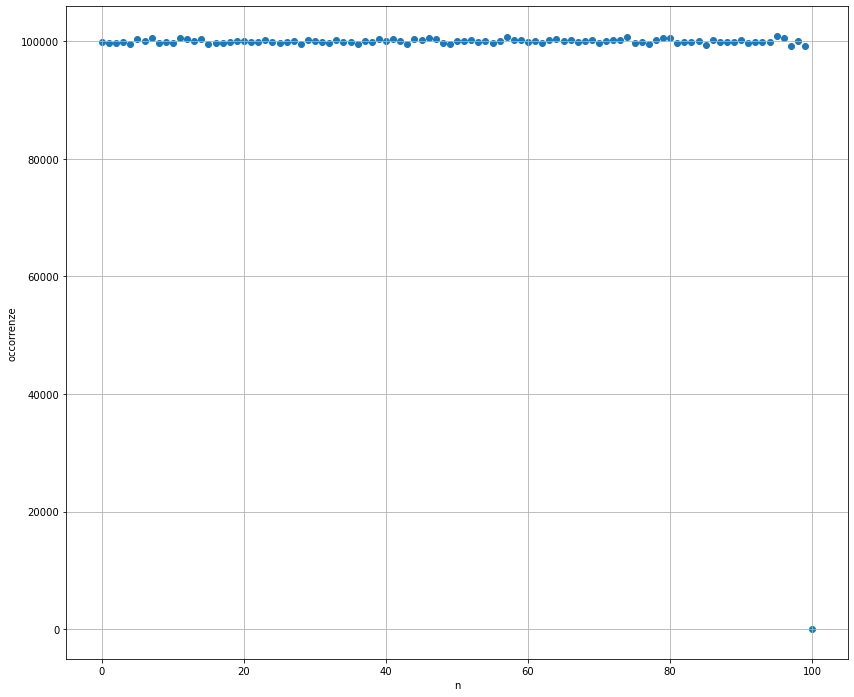

In [16]:
X = np.arange(0,n+1)

plt.figure(figsize=(14,12))
plt.grid()
plt.xlabel("n")
plt.ylabel("occorrenze")
plt.scatter(X, buffer)
plt.show()

# Esercizio 2

In [59]:
t = time()
random.seed(a=None)
N = [10, 50, 250, 1250, 6250]
K = 100

def x2(x):
    return x**2
def cos(x):
    return np.cos(x)


def integrate(n_values, campionamenti, function, massimo, minimo):
    seed = 342423
    random.seed(a = seed)
    somma_integrali = 0
    quadsum_integrali = 0
    counter = 0
    for i in range(campionamenti):
        somma = 0
        for j in range(n_values):
            x = function(minimo + (massimo - minimo)*random.random())
            somma += x
        integral = (massimo - minimo)*somma/n_values
        somma_integrali += integral
        quadsum_integrali += integral**2
        counter += 1
    media = somma_integrali/counter
    varianza = quadsum_integrali/campionamenti - (somma_integrali/campionamenti)**2
    return media, varianza

print("x2 from 0 to 1")
print(integrate(N[0], K, x2, 1, 0))
print(integrate(N[1], K, x2, 1, 0))
print(integrate(N[2], K, x2, 1, 0))
print(integrate(N[3], K, x2, 1, 0))
print(integrate(N[4], K, x2, 1, 0))

print("x2 from 0 to 2")
print(integrate(N[0], K, x2, 2, 0))
print(integrate(N[1], K, x2, 2, 0))
print(integrate(N[2], K, x2, 2, 0))
print(integrate(N[3], K, x2, 2, 0))
print(integrate(N[4], K, x2, 2, 0))

print("cosine from 0 to 1")
print(integrate(N[0], K, cos, 1, 0))
print(integrate(N[1], K, cos, 1, 0))
print(integrate(N[2], K, cos, 1, 0))
print(integrate(N[3], K, cos, 1, 0))
print(integrate(N[4], K, cos, 1, 0))

Y = 1/np.sqrt(N)
X_1 = np.sqrt([(integrate(N[0], K, x2, 1, 0))[1], (integrate(N[1], K, x2, 1, 0))[1], (integrate(N[2], K, x2, 1, 0))[1], (integrate(N[3], K, x2, 1, 0))[1], (integrate(N[4], K, x2, 1, 0))[1]])
X_2 = np.sqrt([(integrate(N[0], K, x2, 2, 0))[1], (integrate(N[1], K, x2, 2, 0))[1], (integrate(N[2], K, x2, 2, 0))[1], (integrate(N[3], K, x2, 2, 0))[1], (integrate(N[4], K, x2, 2, 0))[1]])
X_3 = np.sqrt([(integrate(N[0], K, cos, 1, 0))[1], (integrate(N[1], K, cos, 1, 0))[1], (integrate(N[2], K, cos, 1, 0))[1], (integrate(N[3], K, cos, 1, 0))[1], (integrate(N[4], K, cos, 1, 0))[1]])

x2 from 0 to 1
(0.3385795381121332, 0.007677288891982492)
(0.3354053956238088, 0.00151756713477523)
(0.3342404936841464, 0.00037541198548628196)
(0.3327886542155925, 6.728638161433709e-05)
(0.33290567743404526, 1.1240422379987791e-05)
x2 from 0 to 2
(2.7086363048970656, 0.4913464890868795)
(2.68324316499047, 0.09712429662561473)
(2.673923949473171, 0.024026367071122046)
(2.66230923372474, 0.004306328423317574)
(2.663245419472362, 0.0007193870323192186)
cosine from 0 to 1
(0.8390642493672938, 0.0016524928325987176)
(0.8405403251536145, 0.0003273824770340106)
(0.8411018194223208, 8.10145830786313e-05)
(0.8417363276023347, 1.4576392429743734e-05)
(0.8416717003678933, 2.4355038211743008e-06)


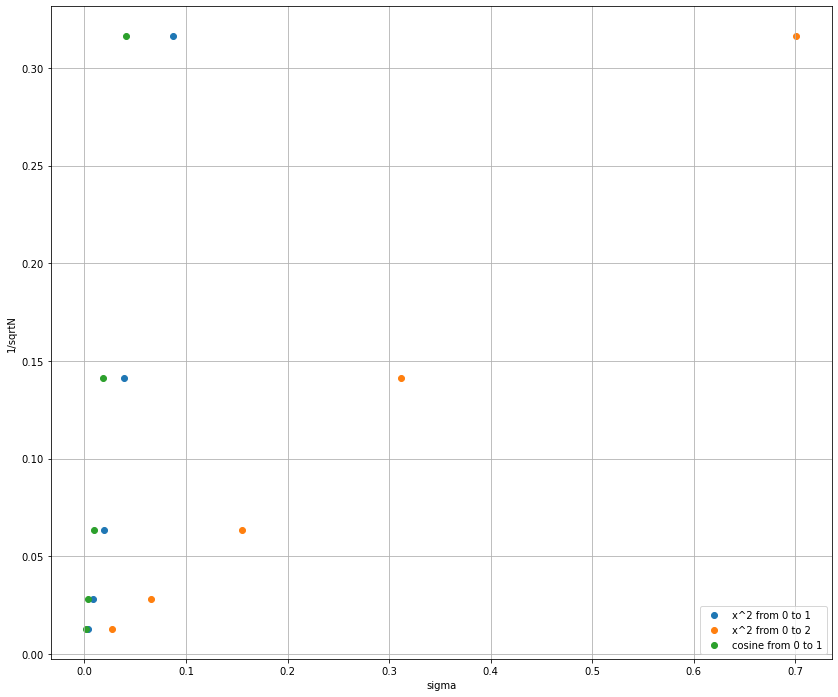

In [60]:
plt.figure(figsize=(14,12))
plt.scatter(X_1, Y, label ="x^2 from 0 to 1")
plt.scatter(X_2, Y, label ="x^2 from 0 to 2")
plt.scatter(X_3, Y, label ="cosine from 0 to 1")
plt.grid()
plt.xlabel("sigma")
plt.ylabel("1/sqrtN")
plt.legend()
plt.show()

# Esercizio 3

In [230]:
N = int(input("Inserisci il numero di random walk che vuoi eseguire: "))
t1 = time()
random.seed(a = None)

counter_sum = 0
counter_counter = 0

for i in range(N):
    x, y = [0, 50]
    counter = 0
    while x < 100 and y < 100 and y>0:
        n = random.random()
        counter += 1
        if n<1./3:
            x+=1
        elif 1./3<n<2./3:
            y+=1
        else:
            y-=1
    counter_sum += counter
    counter_counter += 1
    
counter_mean = counter_sum/counter_counter
print("media dei passi: ",counter_mean)
t2 = time()
print("tempo di elaborazione: ", t2-t1)

Inserisci il numero di random walk che vuoi eseguire: 1000
media dei passi:  298.648
tempo di elaborazione:  0.06702542304992676


## Random Walk plottato per una sola iterazione senza passo indietro

280


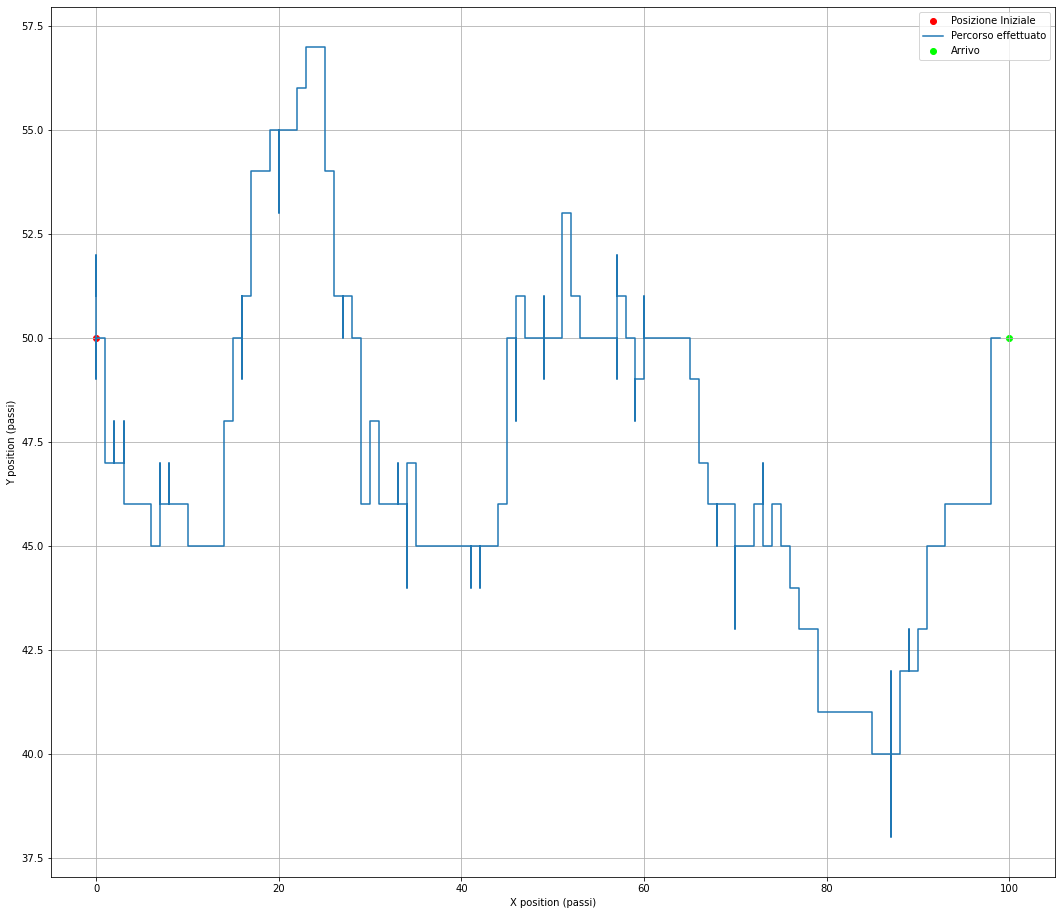

In [231]:
x, y = [0, 50]

random.seed(a = None)
counter = 0

x_story = []
y_story = []

while x < 100 and y < 100 and y>0:
    n = random.random()
    counter += 1
    if n<1./3:
        x+=1
        x_story.append(x)
        y_story.append(y)
    elif 1./3<n<2./3:
        y+=1
        x_story.append(x)
        y_story.append(y)
    else:
        y-=1
        x_story.append(x)
        y_story.append(y)


# print(x, y)
print(counter)

plt.figure(figsize=(18,16))
plt.xlabel("X position (passi)")
plt.ylabel("Y position (passi)")
plt.scatter(0, 50, label="Posizione Iniziale", c="#FF0000")
plt.plot(x_story[0:len(x_story)-1], y_story[0:len(y_story)-1], label="Percorso effettuato")
plt.scatter(x_story[len(x_story)-1], y_story[len(x_story)-1], label="Arrivo", c="#00FF00")
plt.legend()
plt.grid()
plt.show()

## Random Walk plottato con passo all'indietro

Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
Arrivo = Partenza, Riprova
A

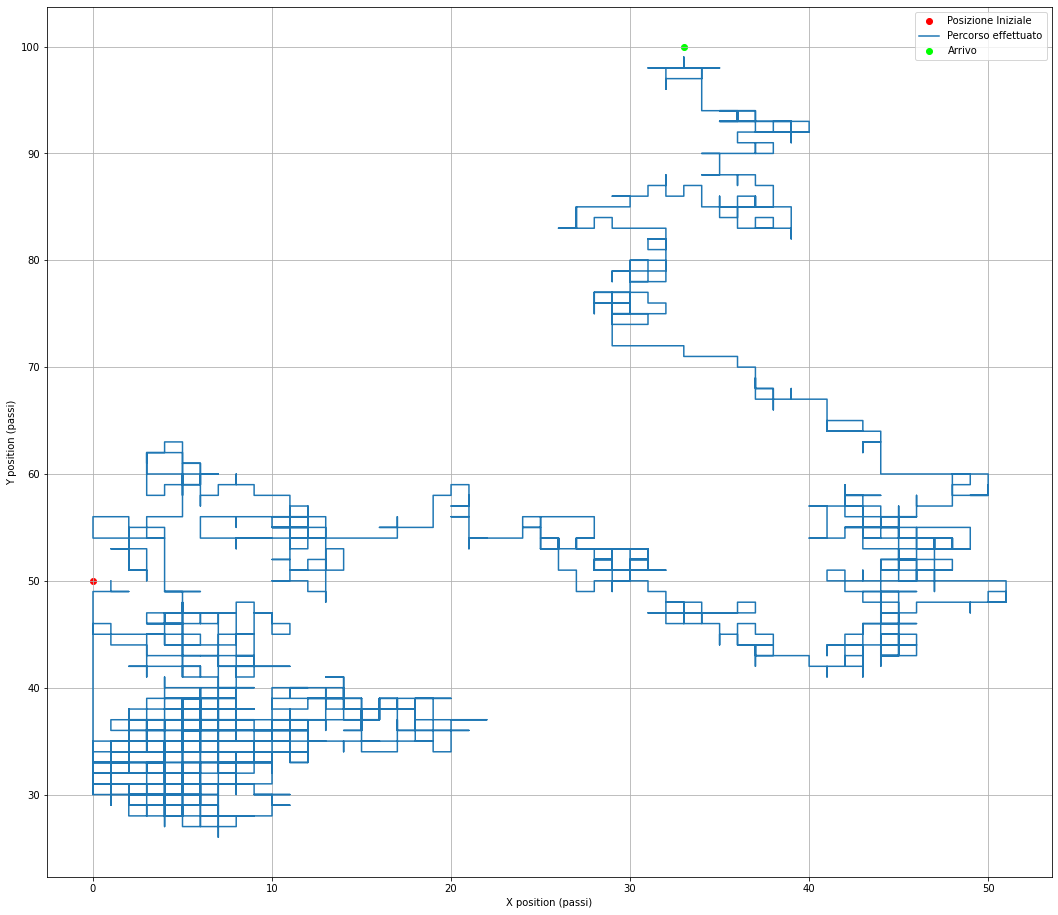

In [232]:
x, y = [0, 50]
xmax, ymax = (100, 100)
xmin, ymin = (0, 0)

random.seed(a = None)
counter = 0

x_story = []
y_story = []

while x < 100 and y < 100 and y>0 and x>=0:
    n = random.random()
    counter += 1
    
    if n<1./4:
        x+=1
        x_story.append(x)
        y_story.append(y)
    elif 1./4<n<2./4:
        y+=1
        x_story.append(x)
        y_story.append(y)
    elif 2./4<n<3./4 and x!=0:
        x-=1
        x_story.append(x)
        y_story.append(y)
    else:
        y-=1
        x_story.append(x)
        y_story.append(y)
    if x == 0:
        print("Arrivo = Partenza, Riprova")
        
if x == 100:
    print("Arrivo sul muro frontale")
elif y == 0: 
    print("Arrivo sul muro inferiore")
elif y == 100:
    print("Arrivo sul muro superiore")

# print(x, y)
print(counter)

plt.figure(figsize=(18,16))
plt.xlabel("X position (passi)")
plt.ylabel("Y position (passi)")
plt.scatter(0, 50, label="Posizione Iniziale", c="#FF0000")
plt.plot(x_story[0:len(x_story)-1], y_story[0:len(y_story)-1], label="Percorso effettuato")
plt.scatter(x_story[len(x_story)-1], y_story[len(x_story)-1], label="Arrivo", c="#00FF00")
plt.grid()
plt.legend()
plt.show()

## Random Walk iterato su N con Scatter Multipli (molto esoso)

Inserisci il numero di random walk che vuoi eseguire: 100000
media dei passi:  299.93539


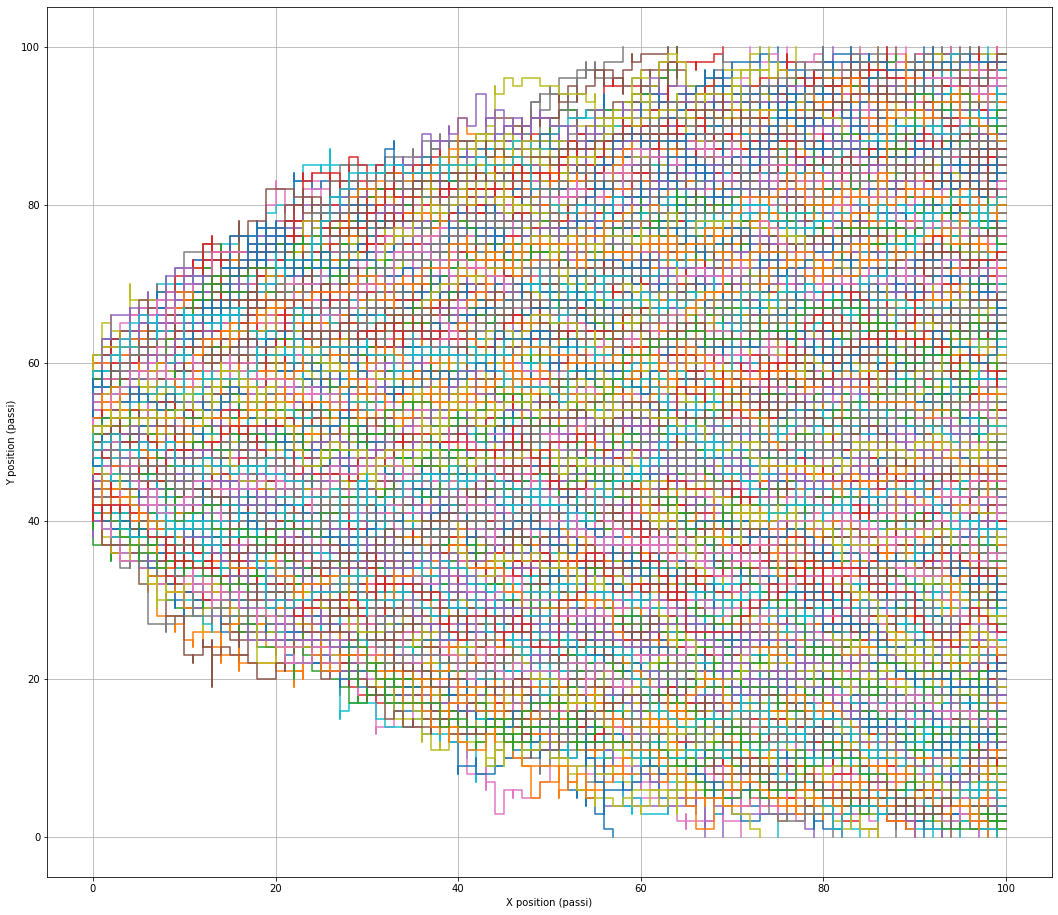

tempo di elaborazione:  94.95467400550842


In [237]:
N = int(input("Inserisci il numero di random walk che vuoi eseguire: "))
counter_sum = 0
counter_counter = 0
t1 = time()
random.seed(a = None)
x_tot=[]
y_tot=[]

for i in range(N):
    x, y = [0, 50]
    x_story = []
    y_story = []
    counter = 0
    while x < 100 and y < 100 and y>0:
        n = random.random()
        counter += 1
        if n<1./3:
            x+=1
            x_story.append(x)
            y_story.append(y)
        elif 1./3<n<2./3:
            y+=1
            x_story.append(x)
            y_story.append(y)
        else:
            y-=1
            x_story.append(x)
            y_story.append(y)
    counter_sum += counter
    counter_counter += 1
    x_tot.append(x_story)
    y_tot.append(y_story)
    
    
counter_mean = counter_sum/counter_counter
print("media dei passi: ",counter_mean)


plt.figure(figsize=(18,16))
plt.xlabel("X position (passi)")
plt.ylabel("Y position (passi)")
for i in range(N):
    plt.plot(x_tot[i], y_tot[i], label="Percorso effettuato")
plt.grid()
#plt.legend()
plt.show()

t2 = time()


print("tempo di elaborazione: ", t2-t1)



